<a href="https://colab.research.google.com/github/Sriram4207/Elevatelabs-task8/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

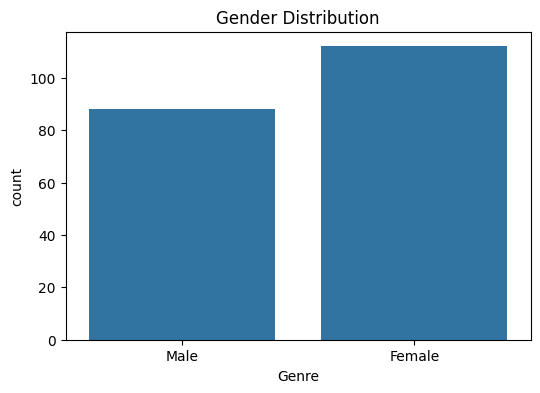

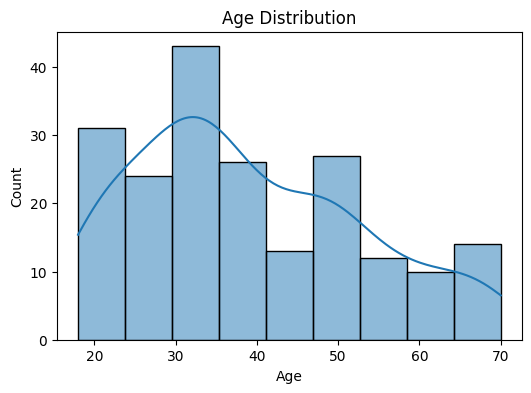

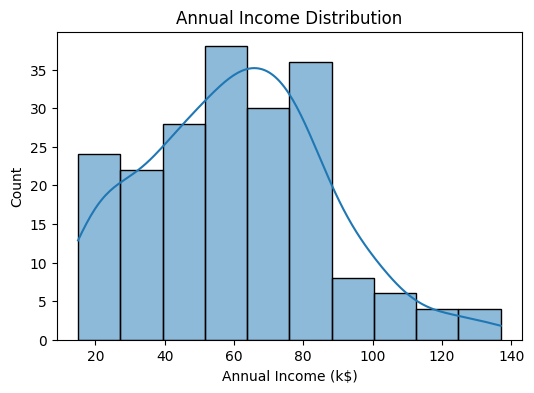

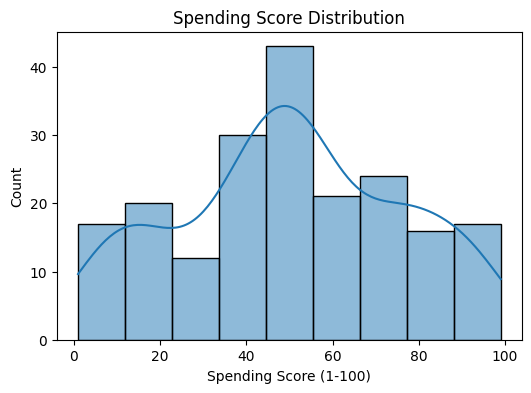

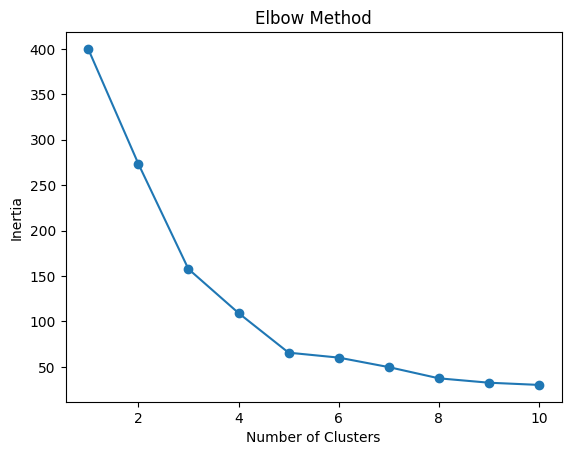

Silhouette Score: 0.5546571631111091


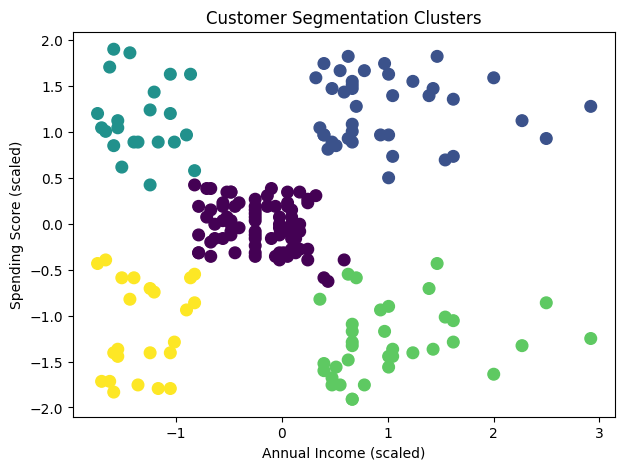

Task Completed Successfully!


In [9]:
# 🔹 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 🔹 Step 2: Load dataset from URL
url = "https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

# 🔹 Step 3: Handle missing values using mean, median and mode
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Annual Income (k$)'] = df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].median())
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])

# 🔹 Step 4: Perform EDA (visualizations)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Genre')
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()

# 🔹 Step 5: Select features and standardize them
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Step 6: Apply the Elbow Method to find optimal K
inertia = []
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# 🔹 Step 7: Create the final K-Means model with optimal K
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 🔹 Step 8: Evaluate using Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", sil_score)

# 🔹 Step 9: Visualize clusters (dots made clear for Google Colab)
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Cluster'], s=70)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

print("Task Completed Successfully!")